# Text Classification with 20 Newsgroups Dataset using RNN and LSTM

This notebook demonstrates how to perform text classification using both RNN and LSTM models on the 20 Newsgroups dataset.

### Step 1: Install TensorFlow

In [1]:
!pip install tensorflow

### Step 2: Import Libraries

In [2]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Step 3: Load and Preprocess the Dataset

In [12]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
num_words=10000
maxlen=200
# Preprocess the data
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(newsgroups.data)
sequences = tokenizer.texts_to_sequences(newsgroups.data)
X = pad_sequences(sequences, maxlen)
y = to_categorical(newsgroups.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Build and Compile the RNN Model

In [15]:
# Build the RNN model
rnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(200,)),  # Input shape based on max_length
    tf.keras.layers.Embedding(10000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True,dropout=0.2,recurrent_dropout=0.2,)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32,dropout=0.2,recurrent_dropout=0.2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(20, activation='sigmoid')  # Sigmoid for binary classification
])

rnn_model.summary()
rnn_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 200, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 200, 128)            │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 64)                  │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 672,276 (2.56 MB)

 Trainable params: 672,276 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Build and Compile the LSTM Model

In [16]:
# Build the LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(200,)),  # Input shape based on max_length
    tf.keras.layers.Embedding(10000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True,dropout=0.2,recurrent_dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(20, activation='sigmoid')  # Sigmoid for binary classification
])

lstm_model.summary()
lstm_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 200, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 200, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 752,724 (2.87 MB)

 Trainable params: 752,724 (2.87 MB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Train the RNN Model

In [14]:
# Train the RNN model

batch_size=32
#X_train, X_test, y_train, y_test
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))

train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

history_rnn = rnn_model.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset,
)

Epoch 1/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 108s 218ms/step - accuracy: 0.0829 - loss: 2.9657 - val_accuracy: 0.2294 - val_loss: 2.5950
Epoch 2/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 143s 221ms/step - accuracy: 0.2837 - loss: 2.4507 - val_accuracy: 0.3639 - val_loss: 2.2308
Epoch 3/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 100s 212ms/step - accuracy: 0.4457 - loss: 1.8911 - val_accuracy: 0.3971 - val_loss: 2.1642
Epoch 4/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 144s 215ms/step - accuracy: 0.5423 - loss: 1.5349 - val_accuracy: 0.4164 - val_loss: 2.1450
Epoch 5/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 142s 216ms/step - accuracy: 0.6231 - loss: 1.2939 - val_accuracy: 0.4294 - val_loss: 2.2131


### Step 7: Train the LSTM Model

In [17]:
# Train the LSTM model
history_lstm =lstm_model.fit(
        train_dataset,
    epochs=10,
    validation_data=test_dataset,
)

Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 220s 446ms/step - accuracy: 0.0904 - loss: 2.8184 - val_accuracy: 0.1735 - val_loss: 2.3644
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 258s 438ms/step - accuracy: 0.1935 - loss: 2.3074 - val_accuracy: 0.2629 - val_loss: 2.0608
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 204s 432ms/step - accuracy: 0.3053 - loss: 1.9546 - val_accuracy: 0.3565 - val_loss: 1.8411
Epoch 4/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 205s 435ms/step - accuracy: 0.4012 - loss: 1.6448 - val_accuracy: 0.4011 - val_loss: 1.6814
Epoch 5/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 260s 431ms/step - accuracy: 0.4790 - loss: 1.4465 - val_accuracy: 0.4448 - val_loss: 1.6113
Epoch 6/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 264s 435ms/step - accuracy: 0.5478 - loss: 1.2327 - val_accuracy: 0.4960 - val_loss: 1.5346
Epoch 7/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 259s 427ms/step - accuracy: 0.6139 - loss: 1.0746 - val_accuracy: 0.5525 - val_loss: 1.3574
Epoch 8/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 205s 434ms/step - accuracy: 0.6831 -

### Step 8: Evaluate the Models

In [18]:
# Evaluate the models
rnn_eval =rnn_model.evaluate(X_test,y_test)
lstm_eval =lstm_model.evaluate(X_test,y_test)

118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.0616 - loss: 3.0191
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.6815 - loss: 1.1515


### Step 9: Plot the Training and Validation Accuracy/Loss

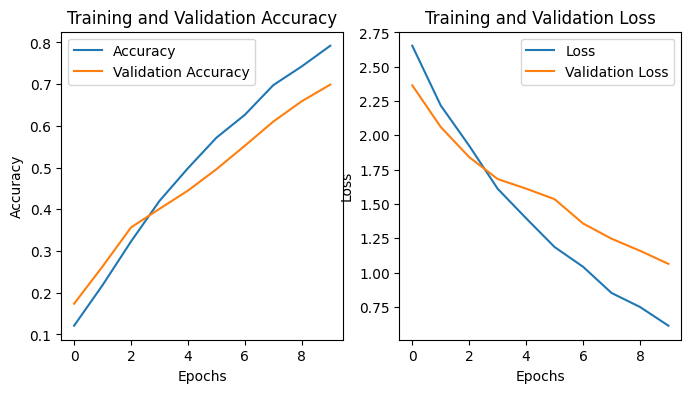

In [20]:
# Plotting the accuracy and loss over time fot LSTM

# Training history
history_dict = history_lstm.history

# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

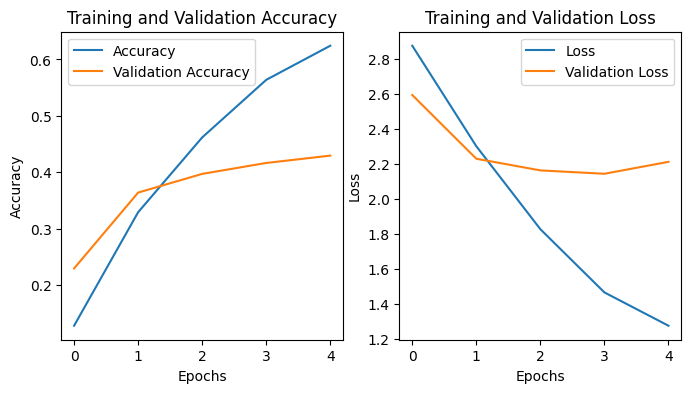

In [21]:
# Plotting the accuracy and loss over time fot RNN

# Training history
history_dict = history_rnn.history

# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

### Step 10: Classify a Sample Text

#**Well done =)**